In [10]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib import collections  as mc

from lib.vizualisation import PoseViewer, AnglePlot, PosePlot, VideoPlot, DualPoseViewer
from lib.pose import Pose, limbs
from lib.preprocessing import *
from lib.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'"""
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)) * 180/np.pi

In [7]:
def vector(x, y, z):
    return np.array([0, 0, 0, x, y, z])

def calc_vector(point1, point2):
    vec = np.array(point2) - np.array(point1)
    return vector(vec[0], vec[1], vec[2])

In [4]:
point1 = (1, 5, 3)
point2 = (-4, 8, 1)

point3 = (3, -1, 2)
point4 = (6, 5, -1)

vec1 = calc_vector(point1, point2)
vec1bis = calc_vector(point2, point1)
vec2 = calc_vector(point3, point4)

<IPython.core.display.Javascript object>


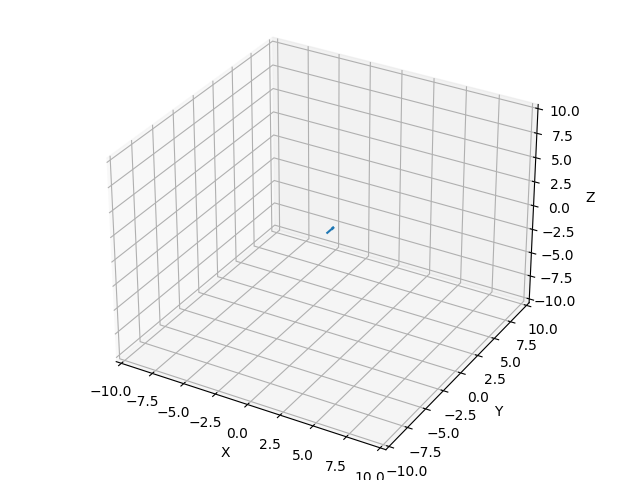

In [5]:
fig = plt.figure()
ax = Axes3D(fig)

X, Y, Z, U, V, W = zip(*np.array([vector(0, 1, 0)]))
ax.quiver(X, Y, Z, U, V, W)

ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])
ax.set_zlabel('Z')
ax.set_xlabel('X')
ax.set_ylabel('Y')

fig.show()

In [6]:
angle_between(vec1, vec2)

78.5402289242151

# Inspect real vectors

In [4]:
import sys
sys.path.append('../VideoPose3D')
from common.camera import *

In [5]:
joints = np.load('joints.npy')

# rot = np.array([ 0.14070565, -0.15007018, -0.7552408 ,  0.62232804]).astype(np.float32)
# joints = camera_to_world(joints, R=rot, t=0)

In [6]:
segments_to_plot = [
 ('right_wrist', 'right_elbow'), ('right_elbow', 'right_shoulder'), ('right_shoulder', 'neck'),
 ('left_knee', 'left_hip'), ('right_knee', 'right_hip'), ('left_hip', 'middle_hip'), 
 ('right_hip', 'middle_hip'), ('left_wrist', 'left_elbow'), ('left_elbow', 'left_shoulder'),
 ('middle_hip', 'middle_body'), ('middle_body', 'neck'), ('left_shoulder', 'neck'),
 ('top_head', 'nose'), ('nose', 'neck'), ('left_ankle', 'left_knee'), ('right_ankle', 'right_knee')
]

body_parts = {
    'nose': 9,
    'top_head': 10,
    'left_shoulder': 11,
    'right_shoulder': 14,
    'left_elbow': 12,
    'right_elbow': 15,
    'left_wrist': 13,
    'right_wrist': 16,
    'left_hip': 4,
    'right_hip': 1,
    'middle_hip':0,
    'middle_body': 7,
    'left_knee': 5,
    'right_knee': 2,
    'neck': 8,
    'left_ankle':6,
    'right_ankle':3
}

def segment(joints, part1, part2):
    idx1 = body_parts[part1]
    idx2 = body_parts[part2]
    
    start = joints[idx1]
    end = joints[idx2]
    
    return np.array([start[0], end[0]]), np.array([start[1], end[1]]), np.array([start[2], end[2]])

def vector(point1, point2):
    vec = point2-point1
    return (vec[0], vec[1], vec[2])

def point_of_part(joints, part):
    return joints[body_parts[part]]

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'"""
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)) * 180/np.pi

def angle_evolution(joints, parts1, parts2):
    angles = []
    for joints_in_frame in joints:
        vec1 = vector(point_of_part(joints_in_frame, parts1[0]), point_of_part(joints_in_frame, parts1[1]))
        vec2 = vector(point_of_part(joints_in_frame, parts2[0]), point_of_part(joints_in_frame, parts2[1]))
        angle = angle_between(vec1, vec2)
        angles.append(angle)
    return angles, vec1, vec2   


def plot_pose(joints):
    
    plt.ioff()
    fig = plt.figure(figsize=(8, 6))
    ax = Axes3D(fig)

    radius = 1.7

    ax.set_xlim3d([-radius/2, radius/2])
    ax.set_zlim3d([-radius/2, radius/2])
    ax.set_ylim3d([-radius/2, radius/2])
    ax.dist = 7.5

    ax.set_zlabel('Z')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.view_init(elev=15., azim=-70)
    
    for (part1, part2) in segments_to_plot:
        c = 'red' if 'right' in part1 or 'right' in part2 else 'black'
        _x, _y, _z = segment(joints, part1, part2)
        ax.plot(_x, _y, _z, zdir='z', c=c)
        
        
    return fig, ax

<IPython.core.display.Javascript object>


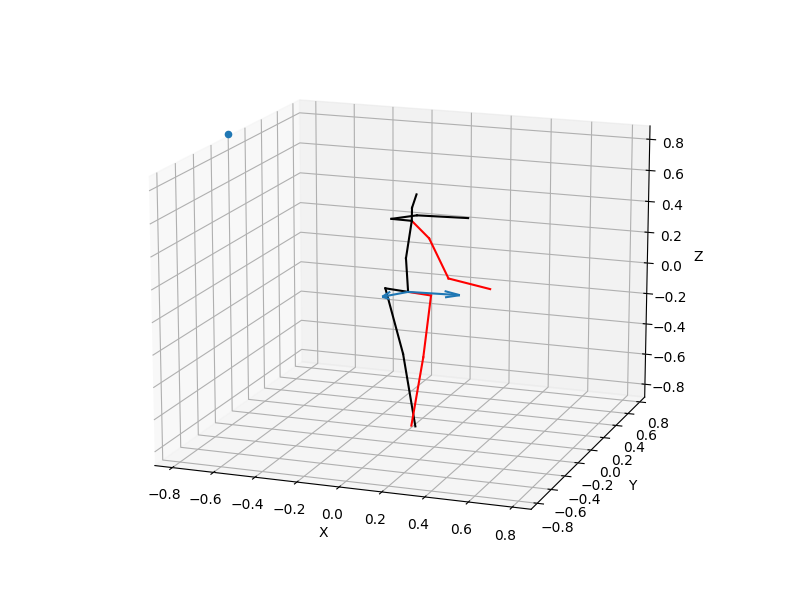

In [24]:
fig, ax = plot_pose(joints[0])


# ax.scatter(point_wrist[0], point_wrist[1], point_wrist[2])
# ax.scatter(point_elbow[0], point_elbow[1], point_elbow[2])
# ax.scatter(point_shoulder[0], point_shoulder[1], point_shoulder[2])
ax.scatter(-1.1266977 ,  0.55908716,  0.72187734)

X, Y, Z, U, V, W = zip(*np.array([vector(vec1[0], vec1[1], vec1[2]), vector(vec2[0], vec2[1], vec2[2])]))
ax.quiver(X, Y, Z, U, V, W)

fig.show()

In [9]:
def get_intersection_3d(point1, vec1, point2, vec2):
    
    """https://math.stackexchange.com/questions/270767/find-intersection-of-two-3d-lines/271366
    
    point1: 3D point on line 1
    vec1: 3D direction vector of line 1
    
    point2: 3D point on line 2
    vec2: 3D direction vector of line 2
    """
    
    C = point1
    D = point2

    e = vec1
    f = vec2
    g = D - C
    
    f_cross_g = np.cross(f, g)
    f_cross_e = np.cross(f, e)
    
    h = np.linalg.norm(f_cross_g)
    k = np.linalg.norm(f_cross_e)
        
    if h == 0 or k == 0:
        return None
    
    f_g_orientation = f_cross_g / np.abs(f_cross_g)
    f_e_orientation = f_cross_e / np.abs(f_cross_e)
    
    sign = 1 if np.array_equal(f_g_orientation, f_e_orientation) else -1
        
    return C + sign * (h/k) * e

In [10]:
point1 = point_of_part(joints[0], 'left_ankle')
point12 = point_of_part(joints[0], 'left_knee')
vec1 = point12 - point1

point21 = point_of_part(joints[0], 'left_knee')
point22_hip = point_of_part(joints[0], 'left_hip')
vec2 = point21 - point22_hip

In [11]:
get_intersection_3d(point1, vec1, point21, vec2)

array([-0.04153953,  0.04593122, -0.41602454], dtype=float32)

In [12]:
f_cross_g / np.abs(f_cross_g)

NameError: name 'f_cross_g' is not defined

In [13]:
point_wrist = point_of_part(joints[0], 'left_wrist')
point_elbow = point_of_part(joints[0], 'left_elbow')
point_shoulder = point_of_part(joints[0], 'left_shoulder')

In [14]:
# Let e and f be direction vectors of α, β, resp. Let g=CD→.

In [15]:
C = point_wrist
D = point_shoulder

e = C - point_elbow
f = point_elbow - D
g = D - C

In [16]:
intersection = get_intersection_3d(C, e, D, f)
intersection

array([-0.04939207,  0.25515   ,  0.3985349 ], dtype=float32)

In [17]:
points_1 = [point_wrist, point_elbow]
points_2 = [point_shoulder, point_elbow]

In [18]:
dist_1 = [np.linalg.norm(point - intersection) for point in points_1]
dist_2 = [np.linalg.norm(point - intersection) for point in points_2]

In [19]:
vec1 = points_1[np.argmax(dist_1)] - points_1[np.argmin(dist_1)]
vec2 = points_2[np.argmax(dist_2)] - points_2[np.argmin(dist_2)]

In [20]:
farthest1 = np.argmax([np.linalg.norm(point_wrist - intersection), np.linalg.norm(point_elbow - intersection)])
farthest2 = np.argmax([np.linalg.norm(point_shoulder - intersection), np.linalg.norm(point_elbow - intersection)])

In [21]:
point_wrist if farthest1 == 0 else point_elbow 
point_shoulder if farthest2 == 0 else point_elbow 

array([-0.07464833, -0.01718703,  0.45658916], dtype=float32)

In [22]:
vec1 = point_wrist - point_elbow if farthest1 == 0 else point_elbow - point_wrist
vec2 = point_shoulder - point_elbow if farthest2 == 0 else point_elbow - point_shoulder

In [23]:
angle_between(vec1, vec2)

92.98635928509367

In [26]:
from lib.pose import Pose

In [27]:
pose = Pose(joints[0])

In [28]:
pose.angle_between_limbs('left_forearm', 'left_arm')

/home/david/Documents/tennis-pose-detection/lib/vector_operations.py:40: RuntimeWarning: invalid value encountered in true_divide
  f_g_orientation = f_cross_g / np.abs(f_cross_g)


92.98635928509367

In [196]:
# Let h=||f×g||, k=||f×e||.
# If either is 0, then there is no intersection; otherwise, they are nonzero and proceed.

h = np.linalg.norm(np.cross(f, g))
k = np.linalg.norm(np.cross(f, e))

h > 0, k > 0
h, k 

(0.07096723, 0.07096721)

In [215]:
np.cross(f, g) / np.abs(np.cross(f, g)), np.cross(f, e) / np.abs(np.cross(f, e))

(array([-1.,  1.,  1.], dtype=float32), array([ 1., -1., -1.], dtype=float32))

In [200]:
C - (h/k) * e

array([-0.04939207,  0.25515   ,  0.3985349 ], dtype=float32)

In [194]:
point_elbow

array([-0.04939203,  0.25515   ,  0.3985349 ], dtype=float32)

In [270]:
C = np.array([6,8,4])
D = np.array([6,8,2])  
e = np.array([-1,0,23])  
f = np.array([5,-9,8])
g = np.array([0,0,-2])

f_g = np.cross(f, g)
f_e = np.cross(f, e)

In [272]:
np.linalg.norm(f_e)

240.95435252346033

In [39]:
angles = []
for joints_in_frame in joints:
    pose = Pose(joints_in_frame)
    angles.append(pose.angle_between_limbs('right_arm', 'shoulders'))
    

/home/david/Documents/tennis-pose-detection/lib/vector_operations.py:40: RuntimeWarning: invalid value encountered in true_divide
  f_g_orientation = f_cross_g / np.abs(f_cross_g)


<IPython.core.display.Javascript object>


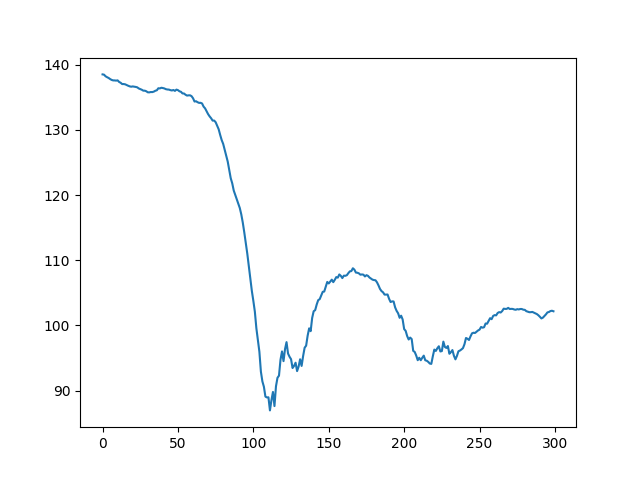

In [40]:
plt.plot(np.arange(len(angles)), angles)
plt.show()

# Angles on differents planes (x,y) and (y,z)

In [2]:
joints = np.load('joints.npy')

In [43]:
poses = [Pose(joints_in_frame) for joints_in_frame in joints]

<IPython.core.display.Javascript object>


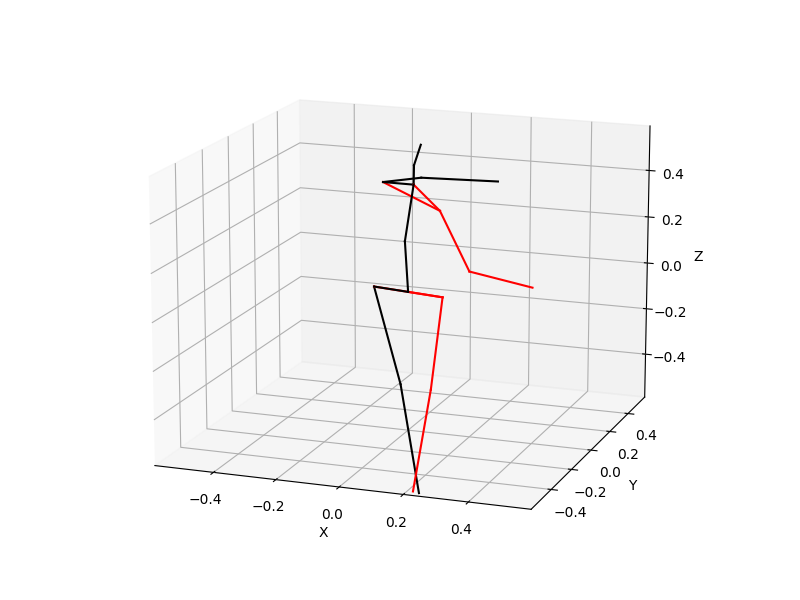

In [44]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)

pose_plot = PosePlot(ax, poses)

In [45]:
pose = poses[0]

In [46]:
pose.joints

array([[ 5.31445858e-06, -3.17643753e-06,  2.32542789e-05],
       [ 1.19394019e-01, -2.18037758e-02, -8.72973353e-04],
       [ 6.85320646e-02,  1.62498355e-02, -4.13085431e-01],
       [ 1.88170932e-02, -7.62510300e-03, -8.50303173e-01],
       [-1.19395994e-01,  2.17954461e-02,  8.81735235e-04],
       [-4.15395312e-02,  4.59312201e-02, -4.16024536e-01],
       [ 6.08647466e-02, -6.95362687e-02, -8.25083315e-01],
       [ 3.48740071e-03, -3.81109267e-02,  2.25162894e-01],
       [ 4.72332537e-02, -8.12129676e-02,  4.77364153e-01],
       [ 1.95954889e-02, -1.75809860e-03,  5.31501889e-01],
       [ 5.47867566e-02, -3.91334891e-02,  6.29832506e-01],
       [-7.46483281e-02, -1.71870291e-02,  4.56589162e-01],
       [-4.93920296e-02,  2.55149990e-01,  3.98534894e-01],
       [ 2.04347700e-01,  2.47933626e-01,  4.11297977e-01],
       [ 1.52301446e-01, -1.41501844e-01,  3.99360776e-01],
       [ 2.76058793e-01, -2.29033664e-01,  1.93594173e-01],
       [ 4.45045680e-01, -1.44566596e-01

In [47]:
from lib.pose import angle_evolution

<IPython.core.display.Javascript object>


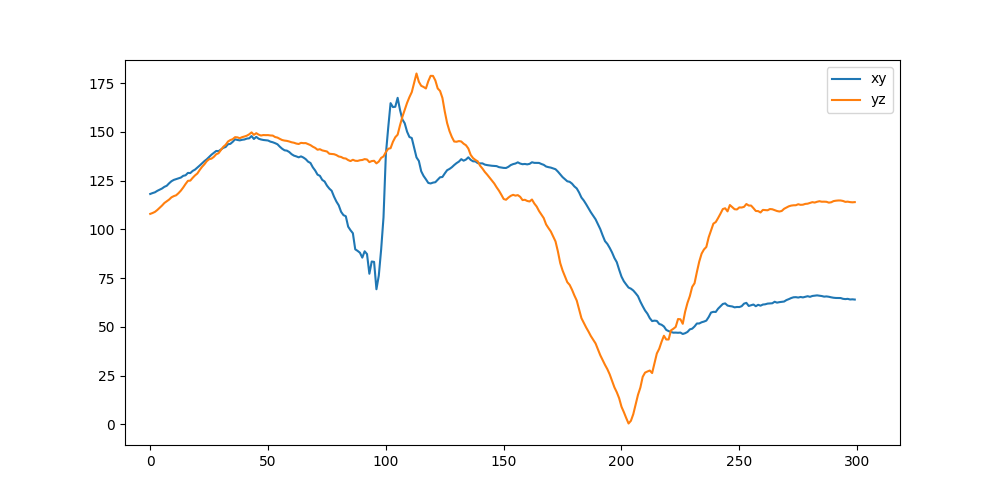

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))

angles_3d, vec1s, vec2s = angle_evolution(poses, 'right_forearm', 'right_arm')
angles_xy, vec1s, vec2s = angle_evolution(poses, 'right_forearm', 'right_arm', [0, 1])
angles_yz, vec1s, vec2s = angle_evolution(poses, 'right_forearm', 'right_arm', [1, 2])

# ax.plot(angles, label='3d')
ax.plot(angles_xy, label='xy')
ax.plot(angles_yz, label='yz')
ax.legend()

In [55]:
forearm = pose.points_of_limb(limbs['right_forearm'])
arm = pose.points_of_limb(limbs['right_arm'])

In [32]:
plt.plot(forearm[:, 0], forearm[:, 1], 0)
plt.plot(arm[:, 0], arm[:, 1], 0)

In [33]:
forearm[:, 2]

array([0.19359417, 0.12017383], dtype=float32)

In [35]:
plt.plot([0, 0], forearm[:, 1], forearm[:, 2])
plt.plot([0, 0], arm[:, 1], arm[:, 2])

In [36]:
from lib.vector_operations import *

In [41]:
vec_arm = arm[0] - arm[1]
vec_forearm = forearm[1] - forearm[0]

In [42]:
angle_between(vec_arm, vec_forearm)

123.54812268858576